In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [22]:
# Image
image = mx.image.imread('Images/dog-bicycle.jpeg')
copy_image = image.asnumpy().copy()

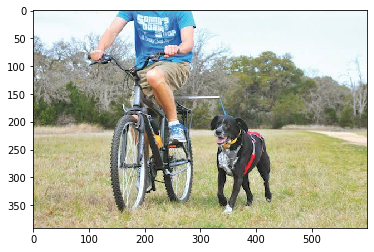

In [3]:
plt.imshow(image.asnumpy())

In [4]:
# Transform
from mxnet.gluon.data.vision import transforms

transform_fn = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([
        .485,.456,.406
    ],
    [
        .229,.224,.225
    ])
])

In [5]:
image = transform_fn(image)

In [6]:
# Batch
image = image.expand_dims(0)

In [7]:
#Model
network = gcv.model_zoo.get_model('fcn_resnet50_ade',pretrained=True)

Model file is not found. Downloading.


57418KB [00:44, 1300.56KB/s]                           


Model file is not found. Downloading.


128832KB [01:39, 1297.77KB/s]                            


In [12]:
output = network.demo(image)

In [13]:
output.shape

(1, 150, 391, 600)

In [14]:
output = output[0]

In [15]:
output_prob = mx.nd.softmax(output,axis=0)

In [16]:
prediction = mx.nd.argmax(output,0).asnumpy()

In [17]:
from gluoncv.utils.viz import get_color_pallete

prediction_image = get_color_pallete(prediction,'ade20k')

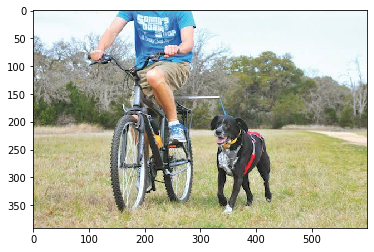

In [23]:
plt.imshow(copy_image)

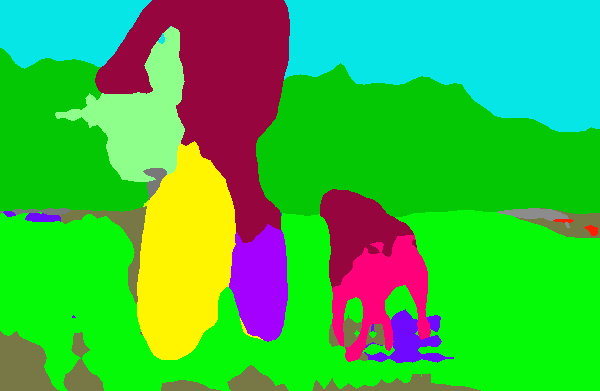

In [24]:
prediction_image